###  ML Task 2 – Regression

### Topic 1: “Aggregate data – Runs per season per player”

In [20]:
import pandas as pd
df = pd.read_csv("Data/ipl_player_season_runs.csv")
df.head(5)
Seasonal = df.groupby(['player','season'])['total_runs'].sum().reset_index()
print(seasonal.head(5))
# Above step is optional not needed now as we have another dataset where we have aggregate dataset


              player  season  runs
0        Abdul Samad    2025   211
1      Andre Russell    2025   104
2  Bhuvneshwar Kumar    2025    97
3     Faf du Plessis    2025   105
4      Glenn Maxwell    2025    14


In [34]:
# Topic 2: Train/Test Split — Simple Explanation
from sklearn.model_selection import train_test_split
X = df[['season']]
y = df[['total_runs']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)



In [35]:
# Topic 3 — Train Linear Regression & Random Forest.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=42)

In [45]:
# Topic 4: Model Evaluation.
from sklearn.metrics import mean_squared_error, r2_score
lin_pred = lin_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)

# Calculate Mean Suqred Error and R2
lin_rmse = mean_squared_error(y_test,lin_pred,squared= False)
lin_r2 = r2_score(y_test,lin_pred)

rf_rmse = mean_squared_error(y_test,rf_pred,squared = False)
rf_r2 = r2_score(y_test,rf_pred)

print("Linear Regression RMSE:", lin_rmse)
print("Linear Regression R² :", lin_r2)
print()
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R² :", rf_r2)


Linear Regression RMSE: 228.79202764573932
Linear Regression R² : -0.020657494976027424

Random Forest RMSE: 241.95946223660346
Random Forest R² : -0.14151987093159812


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


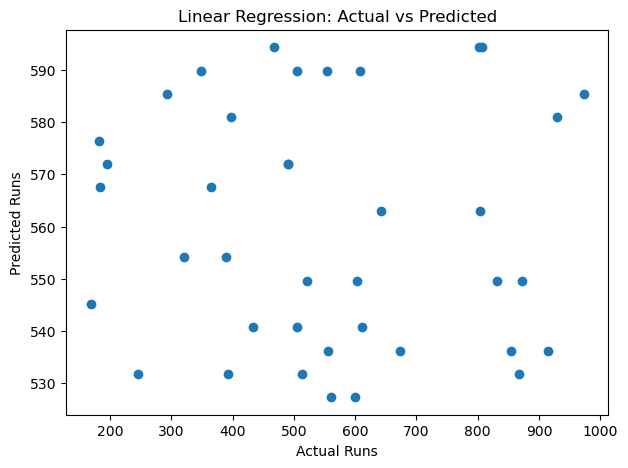

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))

plt.scatter(y_test, lin_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Linear Regression: Actual vs Predicted")

plt.show()

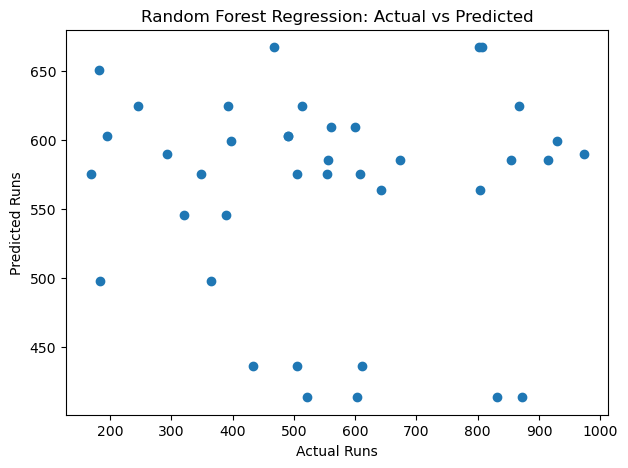

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,rf_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Random Forest Regression: Actual vs Predicted")

plt.show()